# Chapter 2 Exercises

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import arviz as az
import pymc3 as pm
np.random.seed(123)

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


# Question 1
***

Text(0, 0.5, 'y')

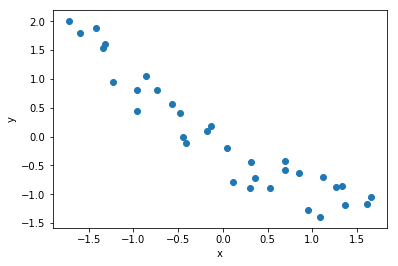

In [2]:
dummy_data = np.loadtxt('../code/data/dummy.csv')
x_1 = dummy_data[:, 0]
y_1 = dummy_data[:, 1]

# Set order of polynomial fit for Question 1
order_1 = 5
x_1p = np.vstack([x_1**i for i in range(1, order_1+1)])
x_1s = (x_1p - x_1p.mean(axis=1, keepdims=True)) / \
    x_1p.std(axis=1, keepdims=True)
y_1s = (y_1 - y_1.mean()) / y_1.std()
plt.scatter(x_1s[0], y_1s)
plt.xlabel('x')
plt.ylabel('y')

In [3]:
trace_1 = []
for sd in [1, 100, np.array([10, 0.1, 0.1, 0.1, 0.1])]:
    with pm.Model() as model_p:
        α = pm.Normal('α', mu=0, sd=1)
        β = pm.Normal('β', mu=0, sd=sd, shape=order_1)
        ϵ = pm.HalfNormal('ϵ', 5)

        μ = α + pm.math.dot(β, x_1s)

        y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y_1s)

        trace_p = pm.sample(2000)
        trace_1.append([sd, trace_p])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ϵ, β, α]
Sampling 2 chains: 100%|██████████| 5000/5000 [00:32<00:00, 154.94draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ϵ, β, α]
Sampling 2 chains: 100%|██████████| 5000/5000 [02:05<00:00, 39.74draws/s]
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ϵ, β, α]
Sampling 2 chains: 100%|██████████| 5000/5000 [00:07<00:00, 641.02draws/s]
The acceptance probability does not match the target. It is 0.8850791171163658, but should be close to 0.8. Try to increase the number of tuning steps.


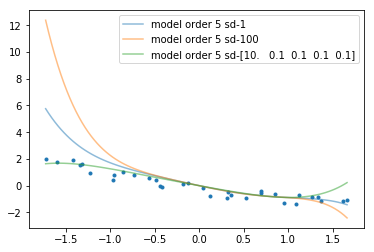

In [4]:
x_new = np.linspace(x_1s[0].min(), x_1s[0].max(), 100)

for i, (sd, trace) in enumerate(trace_1[:3]):

    α_p_post = trace['α'].mean()
    β_p_post = trace['β'].mean(axis=0)
    x_new_p = np.vstack([x_new**i for i in range(1, order_1+1)])
    
    y_p_post = α_p_post + np.dot(β_p_post, x_new_p) 
    plt.plot(x_new_p[0], y_p_post, f'C{i}', label=f'model order {order_1} sd-{sd}', alpha=.5)

plt.scatter(x_1s[0], y_1s, c='C0', marker='.')
plt.legend()

## Questions for Osvaldo:
Are these plots right? At a high level seems to make sense that the very restrice SD "Green line" only fits intercept and nothing else, and that the widest SD has the largest slope because it has the largest coefficients. But could use your double check

# Question 2

How do we increase dummy data to 500 points as that data is provided in a csv and not generated?

# Question 3


In [5]:
dummy_data = np.loadtxt('../code/data/dummy.csv')
x_1 = dummy_data[:, 0]
y_1 = dummy_data[:, 1]
y_1s = (y_1 - y_1.mean()) / y_1.std()

traces_3 = []
for order_3 in [1, 2, 3]:
    x_1p = np.vstack([x_1**i for i in range(1, order_3+1)])
    x_1s = (x_1p - x_1p.mean(axis=1, keepdims=True)) / \
        x_1p.std(axis=1, keepdims=True)
    
    with pm.Model() as model_p:
        α = pm.Normal('α', mu=0, sd=1)
        β = pm.Normal('β', mu=0, sd=1, shape=order_3)
        ϵ = pm.HalfNormal('ϵ', 5)

        μ = α + pm.math.dot(β, x_1s)
        y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y_1s)

        trace_3 = pm.sample(2000)
        traces_3.append([order_3, trace_3])


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ϵ, β, α]
Sampling 2 chains: 100%|██████████| 5000/5000 [00:04<00:00, 1047.71draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ϵ, β, α]
Sampling 2 chains: 100%|██████████| 5000/5000 [00:05<00:00, 857.60draws/s]
The acceptance probability does not match the target. It is 0.8905785745658906, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ϵ, β, α]
Sampling 2 chains: 100%|██████████| 5000/5000 [00:11<00:00, 426.23draws/s]


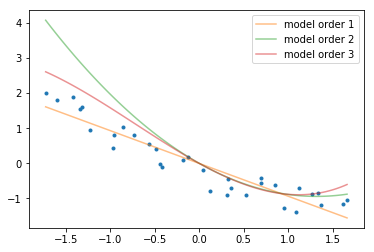

In [6]:
x_new = np.linspace(x_1s[0].min(), x_1s[0].max(), 100)

for order_3, trace in traces_3:
    α_p_post = trace['α'].mean()
    β_p_post = trace['β'].mean(axis=0)

    x_new_order = np.vstack([x_new**i for i in range(1, order_3+1)])

    y_post = α_p_post + np.dot(β_p_post, x_new_order) 
    plt.plot(x_new, y_post, f'C{order_3}', label=f'model order {order_3}', alpha=.5)

plt.scatter(x_1s[0], y_1s, c='C0', marker='.')
plt.legend()

In [7]:
traces_d = {f"Model order {order}":trace for order, trace in traces_3}
az.compare(traces_d)

,waic,pwaic,dwaic,weight,se,dse,warning
Model order 2,9.04674,2.59952,0,1,4.80083,0,0
Model order 3,10.5058,3.10877,1.45908,1.83187e-15,4.72732,0.959315,0
Model order 1,28.4956,2.35617,19.4489,8.88178e-16,5.32558,5.11809,0


## Question for Osvaldo:
I don't get why order 2 model has lowest WAIC. It looks like the worst by far in posterior predictive check of mean values.

## Question 4

First fit the linear and quadratic model again

Text(0, 0.5, 'y')

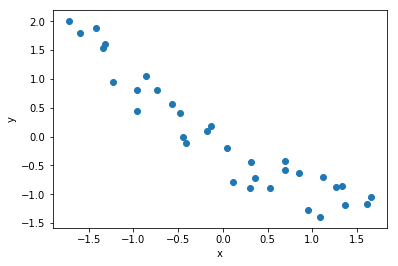

In [8]:
dummy_data = np.loadtxt('../code/data/dummy.csv')
x_1 = dummy_data[:, 0]
y_1 = dummy_data[:, 1]

# Set order of polynomial fit for Question 1
order_1 = 5
x_1p = np.vstack([x_1**i for i in range(1, order_1+1)])
x_1s = (x_1p - x_1p.mean(axis=1, keepdims=True)) / \
    x_1p.std(axis=1, keepdims=True)
y_1s = (y_1 - y_1.mean()) / y_1.std()
plt.scatter(x_1s[0], y_1s)
plt.xlabel('x')
plt.ylabel('y')

In [9]:
# Fit Linear Model
with pm.Model() as model_l:
    α = pm.Normal('α', mu=0, sd=1)
    β = pm.Normal('β', mu=0, sd=10)
    ϵ = pm.HalfNormal('ϵ', 5)

    μ = α + β * x_1s[0]

    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y_1s)

    trace_l = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ϵ, β, α]
Sampling 2 chains: 100%|██████████| 5000/5000 [00:04<00:00, 1204.72draws/s]


In [11]:
# Fit quadratic model
order_4 = 2
x_1p = np.vstack([x_1**i for i in range(1, order_4+1)])
x_1s = (x_1p - x_1p.mean(axis=1, keepdims=True)) / \
    x_1p.std(axis=1, keepdims=True)
y_1s = (y_1 - y_1.mean()) / y_1.std()

with pm.Model() as model_p:
    α = pm.Normal('α', mu=0, sd=1)
    β = pm.Normal('β', mu=0, sd=10, shape=order_4)
    ϵ = pm.HalfNormal('ϵ', 5)
    μ = α + pm.math.dot(β, x_1s)

    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y_1s)

    trace_p = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ϵ, β, α]
Sampling 2 chains: 100%|██████████| 5000/5000 [00:08<00:00, 599.00draws/s]


In [12]:
# Generate posterior predictive draws
posterior_predictive_draws = 2
y_l = pm.sample_posterior_predictive(trace_l, posterior_predictive_draws,
                                     model=model_l)['y_pred']

y_p = pm.sample_posterior_predictive(trace_p, posterior_predictive_draws,
                                     model=model_p)['y_pred']

100%|██████████| 2/2 [00:00<00:00, 13.82it/s]


Text(0.5, 1.0, 'Linear Posterior Predictive Fit')

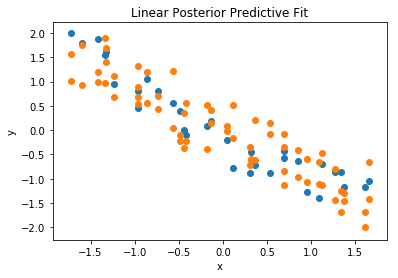

In [13]:
# Plot Linear Posterior Predictive fit
plt.scatter(x_1s[0], y_1s)
plt.scatter(np.tile(x_1s[0], posterior_predictive_draws), y_l)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Posterior Predictive Fit')

Text(0.5, 1.0, 'Quadratic Posterior Predictive Fit')

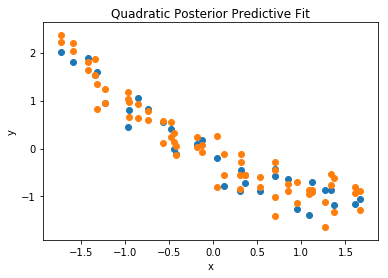

In [14]:
# Plot Quadratic Posterior Predictive fit
plt.scatter(x_1s[0], y_1s)
plt.scatter(np.tile(x_1s[0], posterior_predictive_draws), y_p)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Quadratic Posterior Predictive Fit')